# 4.3 PCA

Cada vegada tenim més sistemes amb un nombre elevadíssim de dades a analitzar de les qual hem de poder extreure alguna conclusió. Per exemple, si volem analitzar el rendiment dels jugadors de bàsquet de la NBA, pot ser hauríem de tenir en compte l'edat del jugador, l'alçada, els partits jugats, els partits guanyats, els partits perduts, quantes cistelles de 2 punts ha fet, quantes de 3, quants tirs lliures, quants rebots agafats, quants perdut, quantes faltes, etc. O, si volem extreure conclusions sobre hàbits de salut, pot ser voldríem estudiar un grup de població amb dades com el gènere, l'edat, la raça, el tipus d'alimentació, si fa o no algun esport, i de quin tipus, quants minuts camina al dia, si té fills, nivell de salari, amb quanta gent viu a casa, si viu a platja o muntanya, a ciutat o poble, etc.

Tot plegat és una quantitat de dades enorme que fa difícil la manipulació i l'extracció de conclusions. A més, tenir en compte totes les dades té un cost elevat de càlcul i moltes vegades també de temps d'execució. 

El mètode d'Anàlisi de Components Principals, més conegut com **PCA** (del seu nom en anglès _Principal Component Analysis_), és una tècnica lineal per *reduir* les dimensions d'un conjunt de dades a la vegada que conserva la majoria de la informació rellevant, és com si *condensés* la informació en el mínim espai possible. 

Imaginem que tenim una mostra d'$\begin{equation}n\end{equation}$ individus (els jugadors de bàsquet o els individus per l'estudi dels hàbits de salut) on cada individu té $\begin{equation}p\end{equation}$ variables $\begin{equation}(X_1, X_2, ..., X_p)\end{equation}$, és a dir que l'espai mostral té $\begin{equation}p\end{equation}$ dimensions. PCA permet trobar un subespai de dimensió $\begin{equation}z\end{equation}$ (on $\begin{equation}z<p\end{equation}$) que expliquin més o menys el mateix que les $\begin{equation}p\end{equation}$ variables originals. On abans necessitàvem $\begin{equation}p\end{equation}$ valors per caracteritzar a cada individu, ara en tenim prou amb $\begin{equation}z\end{equation}$ valors. Cadascuna d'aquestes $\begin{equation}z\end{equation}$ noves variables reben el nom de **components principals**. Cada component principal s'obté per una combinació lineal de les variables originals.

El PCA utilitza la correlació existent entre dimensions i intenta trobar el mínim nombre de variables que mantenen la màxima informació sobre la distribució del conjunt de dades original. D'aquesta manera elimina la redundància de les dades, redueix les dimensions del conjunt de dades original i, a la vegada, manté el màxim d'informació útil; tot plegat permet una descripció de les dades a un cost molt menor.

Per aconseguir-ho, carrega les dades originals en una matriu i aplica els càlculs matemàtics necessaris per trobar els eigenvectors. Els eigenvectors d'una matriu de covariància tenen la propietat de senyalar les principals direccions de les variacions de les dades; les seves variacions màximes. D'aquesta manera, la reducció de dimensions aplicada es realitza de manera que les noves variables són ortogonals unes a les altres i, per tant, són independents i no estan correlacionades entre elles (no hi ha redundància de dades). 

Un cop es tenen el eigenvectors, el mètode també calcula els eigenvalues associats a cadascun d'ells. Els eigenvalues serveixen per ordenar per ordre d'importància els eigenvectors resultants. 

Imaginem que tenim un grup de dades amb 10 variables o característiques cadascuna, tindrem un sistema de 10 dimensions. El PCA crearà (com a molt) 10 noves variables, 10 vectors, on cada vector serà una combinació única de les 10 característiques antigues. Al fer-ho utilitzarem una tècnica específica i a més les ordenarem de millor a pitjor segons si aporten més informació al conjunt total de dades. D'aquesta manera podrem escollir el mínim nombre de components que mantinguin el màxim d'informació. A més, com cada nova variable, cada vector, és una combinació específica de totes les variables antigues, estarem mantenint informació de totes les variables inicials amb més o menys pes segons la importància que tinguin per l'objectiu final.  

No entrarem a explicar en detall com es calculen matemàticament els components principals, si hi esteu interessats podeu utilitzar la documentació detallada en la secció *Referències*, però sí que és interessant saber els passos principals del PCA (detallats a continuació) i destacar que sempre necessitem normalitzar les dades d'entrada per obtenir resultats amb sentit:
1. Centrat i estandardització de les dades (normalització de les dades)
2. Càlcul de la matriu de covariància que és simètrica i diagonalitzable i que quantifica la covariància entre els mesuraments.
3. Càlcul dels vector propis, ordenades segons el valor propi i que, a més, serveixen de noves coordenades del sistema on es maximitza la variància.
4. S'escull el número idoni de vectors propis que són anomenats components principals. Aquests descriuran la informació del conjunt de dades d'acord amb el seu coeficient d'inèrcia present en cada component principal.

El PCA es pot fer servir per accelerar sistemes amb alt número de dimensions, o per aplicar directament una reducció de la dimensionalitat de les dades, per exemple per quan volem reduir dades amb 4 o més variables o dimensions per poder visualitzar-les en un gràfic 2D o 3D.

Anem a veure amb un exemple pràctic de reducció de dimensions aplicant el mètode PCA per reduir una base de dades de 4 dimensions a dues, a la vegada que mantenim informació rellevant de les variables originals en la visualització. Per fer-ho hem escollit la base de dades Iris on tenim informació sobre 3 tipus de lliris (iris setosa, iris versicolor i iris virginica). De cada tipus de flor tenim 50 mostres, a les quals se'ls ha medit la longitud i l'amplada del sèpal (calze) i del pètal (4 mesuraments per flor). En total, doncs, tenim 3 classes,  150 mostres i 4 dimensions (o característiques). I ara bé la dada més important per interpretar els resultats i saber si el mètode PCA és el millor en aquest cas: de les 3 classes de flors, una classe és linealment separable de les altres dues; però les altres dues NO es poden separar linealment entre elles. Mantindrem aquesta relació quan apliquem PCA i reduïm el sistema a dues dimensions? Anem-ho a veure!



Variança explicada 72.77045209380132 


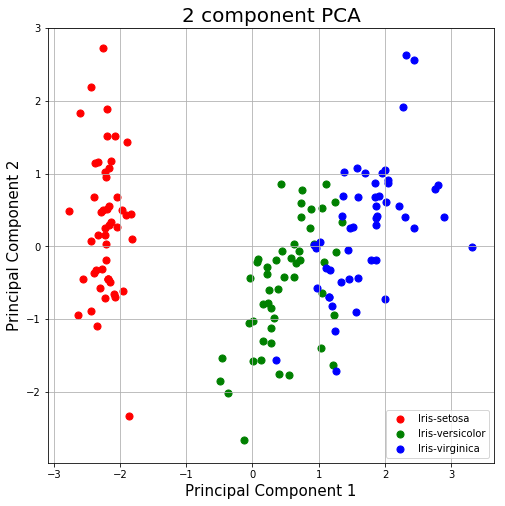

In [48]:
# EXEMPLE PRÀCTIC DE REDUCCIÓ DE DIMENSIONS
# Com mostrem dades de 4 dimensions amb un gràfic de 2 dimensions?

import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Carreguem les dades en un dataset de Pandas. Cada fila és una mostra i cada columna una característica
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# Normalitzem les dades per columnes per a fer que tinguin mitjana 0 i variància 1

from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Escollim els components principals

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# Mostrem el gràfic resultant
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Al reduir dimensions, perdem variança. Mostrem el percentatge de variança explicada en aquesta projecció de les dades
print("Variança explicada {} ".format(pca.explained_variance_ratio_[0] * 100))

Doncs sembla que el PCA sí que ha mantingut la relació entre classes en els resultats finals! tot i haver reduït el conjunt de dades de 4 a 2 dimensions. Us animem a que proveu amb altres conjunts de dades, podeu trobar-ne més a la mateixa font d'on hem tret aquest exemple: al [Machine Learning Repository](http://archive.ics.uci.edu/ml)

Hem de tenir en compte, però, que el mètode PCA presenta alguns inconvenients: a vegades és difícil interpretar els resultats (veure [aquest article](https://towardsdatascience.com/understanding-pca-fae3e243731d) com exemple) i, també és important destacar que és molt influenciable a la presència de *outliers* (aquelles mostres que se surten molt de la mitja i que són casos rars i atípics).

PCA també té aplicacions en la visió per computador. S'ha aplicat per detecció de patrons i per compressió d'imatges, entre d'altres. El PCA pot servir per fer una aproximació d'una imatge original de molta resolució (dades d'altes dimensions) a una representació comprimida de la mateixa (dades de dimensió inferior). Per aconseguir-ho necessitarà un grup d'imatges similar de les quals extreure els components principals.

Anem a veure un exemple de compressió d'imatges, però abans de començar hem d'aclarir quina representació de la imatge estem utilitzant. Fins ara hem creat matrius per aplicar el PCA fent servir d'$\begin{equation}n\end{equation}$ mostres amb $\begin{equation}p\end{equation}$ variables cadascuna que creaven una vector $\begin{equation}(X_1, X_2, ..., X_p)\end{equation}$ (espai mostral de $\begin{equation}p\end{equation}$ dimensions). Cada mostra tenia un vector de característiques associat, i ocupava una fila de la matriu inicial del PCA.

En el cas de les imatges, també tindrem $\begin{equation}n\end{equation}$ mostres, però com representem cadascuna d'elles en la matriu a aplicar el PCA? Doncs igual que ho hem fet fins ara, fent servir les matrius on cada element de la mateixa era el valor del gris del píxel corresponent, sols que ara posem cada fila de la matriu de la imatge una darrera l'altra per crear una única fila de la nova matriu amb el conjunt de imatges a estudiar.

Una imatge quadrada de $\begin{equation}N\end{equation}$ per $\begin{equation}N\end{equation}$ píxels es pot representar amb un vector de $\begin{equation}X\end{equation}$ de $\begin{equation}N^2\end{equation}$ dimensions:

<center>$\begin{equation}X = (x_1, x_2, x_3, ..., x_{N^2})\end{equation}$<br></center>

on cada fila de píxels de la imatge estan col·locats un darrere l'altre formant una imatge uni-dimensional; els primers $\begin{equation}N\end{equation}$ elements $\begin{equation}x_1...x_N\end{equation}$ seran la primera fila de la imatge, els següents $\begin{equation}N\end{equation}$ elements $\begin{equation}x_{N+1}...x_{2N}\end{equation}$ la segona fila i així fins el final.

Ara que ja tenim aclarit com representarem un conjunt d'imatges per aplicar el PCA, ja podem començar l'exemple pràctic. En aquest cas hem utilitzat un subconjunt molt petit del MNIST (de l'anglès _modified National Institute of Standards and Technology_). El MNIST s'utilitza molt en la recerca del reconeixement òptic de caràcters i del machine learning. Consta d'una col·lecció de 70.000 imatges de dígits escrits a mà, cada imatge és una imatge quadrada de 28x28 píxels, el que dóna imatges de 784 dimensions o característiques seguint la representació que hem explicat anteriorment. Anem a veure si aplicant PCA aconseguim reduir aquestes 784 dimensions sense perdre informació important, és a dir, aconseguint que la imatge resultant continuï sent identificable.


nombre components per a retenir el 95% de la variança 54


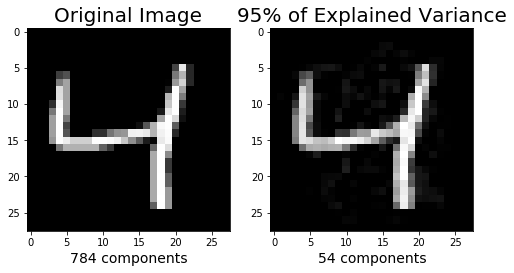

In [49]:
# Exemple pràctic: PCA Aplicat a imatges
# Aplicarem PCA per a reduir la dimensionalitat d'imatges expressades com a vectors
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# carreguem les dades. Corresponen a un petit subconjunt de MNIST (dataset per a reconeixement de dígits manuscrits)
# MNIST conté imatges de 28x28 píxels en nivells de gris (784 valors)
mnist = np.loadtxt('Data/mnist_crop.csv')

# calculem un PCA per a quedar-nos amb el 95% de la variança
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(mnist)

print("nombre components per a retenir el 95% de la variança {}".format(pca.n_components_))

# ara, podríem treballar només amb 54 de les dimensions, no calen les 784. Això agilitza molt treballar amb algoritmes posteriors

# fem la transformació inversa per veure com es queden les imatges després de la reducció de dimensionalitat
approximation = pca.inverse_transform(lower_dimensional_data)

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('{} components'.format(pca.n_components_), fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);




Veiem que amb només 54 components mantenim el 95% de la variància, aquesta és una millora espectacular. Imagineu-vos que voleu aplicar algun algoritme de machine learning per aprendre a identificar dígits escrits manualment, només aplicant PCA a les dades d'entrada ja reduiríeu el problema original de 754 dimensions a només 54, el que acceleraria molt la velocitat d'execució de qualsevol algoritme aplicat i encara mantindríem l'essència de les dades originals. 

Així doncs, podem concloure que el mètode de PCA pot ser molt útil tant per la reducció de dimensions de les dades d'entrada com per la visualització de les mateixes. També cal destacar que la reducció de dimensions amb PCA és una tècnica àmpliament utilitzada per accelerar l'aprenentatge i la resolució d'algoritmes de machine learning. 


## Referències

- A tutorial on Principal Components Analysis; Lindsay I Smith: [http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)
- Análisis de Componentes Principales (Principal Component Analysis, PCA) y t-SNE; Joaquín Amat Rodrigo: [https://rpubs.com/Joaquin_AR/287787](https://rpubs.com/Joaquin_AR/287787)
- Understanding PCA (Principal Components Analysis); Tony Yiu: [https://towardsdatascience.com/understanding-pca-fae3e243731d](https://towardsdatascience.com/understanding-pca-fae3e243731d)
- Eigenvalues and Eigenvectors, [Swarthmore College](https://www.swarthmore.edu/): [https://lpsa.swarthmore.edu/MtrxVibe/EigMat/MatrixEigen.html](https://lpsa.swarthmore.edu/MtrxVibe/EigMat/MatrixEigen.html)
- Base de dades Iris: [https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)
- Més bases de dades per testejar: Machine Learning Repository: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
- Calculant l'exemple de PCA amb Iris pas a pas: [http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)